# Scale-Invariant Feature Transform (SIFT) 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Steps-of-SIFT" data-toc-modified-id="Steps-of-SIFT-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Steps of SIFT</a></span></li><li><span><a href="#SIFT-Implementation" data-toc-modified-id="SIFT-Implementation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>SIFT Implementation</a></span><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Read-and-convert-the-image-to-grayscale-for-SIFT-processing" data-toc-modified-id="Read-and-convert-the-image-to-grayscale-for-SIFT-processing-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Read and convert the image to grayscale for SIFT processing</a></span></li><li><span><a href="#Create-SIFT-Detector" data-toc-modified-id="Create-SIFT-Detector-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Create SIFT Detector</a></span></li><li><span><a href="#Visualize-Keypoints" data-toc-modified-id="Visualize-Keypoints-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Visualize Keypoints</a></span></li><li><span><a href="#Compare-Keypoints-Between-Two-Images" data-toc-modified-id="Compare-Keypoints-Between-Two-Images-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Compare Keypoints Between Two Images</a></span></li></ul></li><li><span><a href="#Reference-Links" data-toc-modified-id="Reference-Links-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reference Links</a></span></li></ul></div>

## Steps of SIFT

1. Scale-Space Extrema Detection:
    - Scale-Space Construction: Convolve the image with a Difference of Gaussians (DoG) filter across multiple scales.
    - Extrema Detection: Identify local extrema in the scale-space as potential keypoints.
    
    
    
    
    
2. Keypoint Localization:
    - Accurate Position: Refine the exact position of keypoints using Taylor series expansion.
    - Elimination of Low-Contrast Keypoints: Discard keypoints with low contrast.
    - Edge Response Removal: Remove keypoints with high edge responses to avoid false positives.
    
    
    
    
    
3. Orientation Assignment:

    - Gradient Calculation: Compute gradient magnitude and orientation for the neighborhood around each keypoint.
    - Peak Finding: Create a histogram of gradient orientations and assign the dominant orientation to the keypoint.
    
    
    
    
    
4. Keypoint Descriptor:

    - Descriptor Generation: Create a 128-dimensional descriptor for each keypoint based on local gradient histograms.
    
    
5. Keypoint Matching:

    - Feature Matching: Match keypoints from different images using their descriptor similarity.
    - Geometric Verification: Filter matches to ensure they satisfy geometric consistency.

## SIFT Implementation

### Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Read and convert the image to grayscale for SIFT processing

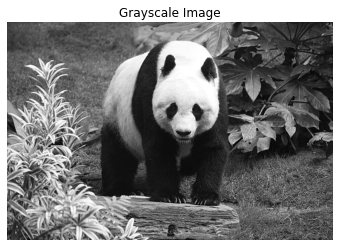

In [3]:
# Read Image 
image_path = "Panda.jpg"  
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display Image 
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

### Create SIFT Detector

- Create a SIFT object using OpenCV's cv2.SIFT_create().
- Detect keypoints and compute descriptors.

In [4]:
# Create a SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

print(f"Number of keypoints detected: {len(keypoints)}")
print(f"Shape of descriptor array: {descriptors.shape}")

Number of keypoints detected: 3050
Shape of descriptor array: (3050, 128)


###  Visualize Keypoints

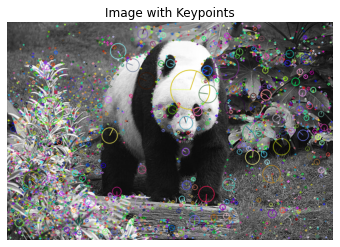

In [5]:
# Draw keypoints on the image
keypoints_image = cv2.drawKeypoints(
    gray_image, 
    keypoints, 
    None, 
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(keypoints_image, cv2.COLOR_BGR2RGB))
plt.title("Image with Keypoints")
plt.axis('off')
plt.show()

###  Compare Keypoints Between Two Images

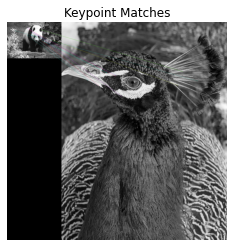

In [7]:
# Load 2nd image and extract SIFT features
image2 = cv2.imread("Peacock.jpeg")
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
keypoints2, descriptors2 = sift.detectAndCompute(gray_image2, None)

# Match descriptors using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors, descriptors2)

# Sort matches
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
matched_image = cv2.drawMatches(
    gray_image, keypoints, 
    gray_image2, keypoints2, 
    matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Display matches
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title("Keypoint Matches")
plt.axis('off')
plt.show()


## Reference Links

- https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html